In [42]:
from pandas_datareader import data as pdr
from datetime import datetime,date
import pandas as pd
import yfinance as yf
yf.pdr_override()


from datetime import datetime
startdate = datetime(2015,1,1)
today = date.today()
enddate = today

# data = pd.read_csv("TATASTEEL.NS.csv")

df = pdr.get_data_yahoo("TATASTEEL.NS", start=startdate, end=enddate)

# dates = pd.to_datetime(data["Date"])
cols = list(df)[:7]
data = df[cols].astype(float)
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,37.833172,38.681107,37.833172,38.533432,14.594913,26570816.0
2015-01-02,38.681107,39.348022,38.681107,39.133656,14.822255,36043328.0
2015-01-05,39.348022,40.153084,39.348022,39.700535,15.036966,54638866.0
2015-01-06,39.443295,39.443295,37.571171,37.776009,14.308033,64767961.0
2015-01-07,37.899864,37.899864,36.546978,37.051926,14.033778,49846923.0
...,...,...,...,...,...,...
2023-03-29,102.500000,104.500000,101.650002,103.599998,103.599998,37221124.0
2023-03-31,105.000000,105.500000,104.099998,104.500000,104.500000,34579415.0
2023-04-03,105.099998,105.250000,103.800003,104.099998,104.099998,21840428.0


In [43]:
days = 14


delta = data["Close"].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
average_up = up.ewm(com=(days - 1), adjust=False).mean()
average_down = down.ewm(com=(days - 1), adjust=False).mean()
rs = average_up / average_down

data['RSI'] = 100 - (100 / (1 + rs))

data = data.iloc[days:]

# data = data['RSI']
data = data[1:]
data

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-22,37.918919,38.557251,37.728371,38.433395,14.557023,47523195.0,67.978598
2015-01-23,39.062202,39.252750,38.014191,38.404812,14.546197,47511356.0,67.754910
2015-01-27,38.376232,38.490559,37.680733,37.957027,14.376592,41693694.0,64.191345
2015-01-28,37.823643,37.823643,37.051926,37.266293,14.114973,41936541.0,59.033486
2015-01-29,37.185310,37.385384,36.556503,37.194839,14.087906,54190694.0,58.509746
...,...,...,...,...,...,...,...
2023-03-29,102.500000,104.500000,101.650002,103.599998,103.599998,37221124.0,40.867752
2023-03-31,105.000000,105.500000,104.099998,104.500000,104.500000,34579415.0,43.932304
2023-04-03,105.099998,105.250000,103.800003,104.099998,104.099998,21840428.0,42.868925


In [44]:
# data = data[['Close',"RSI"]]
data = data[['Close','Volume','RSI']]
data

,Close,Volume,RSI
Date,,,
2015-01-22,38.433395,47523195.0,67.978598
2015-01-23,38.404812,47511356.0,67.754910
2015-01-27,37.957027,41693694.0,64.191345
2015-01-28,37.266293,41936541.0,59.033486
2015-01-29,37.194839,54190694.0,58.509746
...,...,...,...
2023-03-29,103.599998,37221124.0,40.867752
2023-03-31,104.500000,34579415.0,43.932304
2023-04-03,104.099998,21840428.0,42.868925


In [45]:
data.shape

(2026, 3)

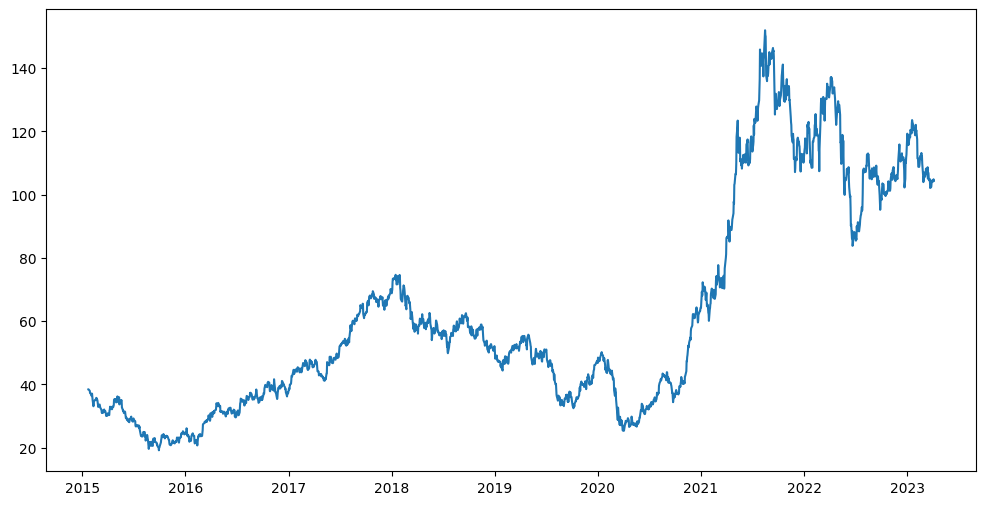

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data["Close"])

In [48]:
import numpy as np


In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
# print(df)
data = scaler.fit_transform(data)

print(data)

# print(scaler.inverse_transform(df))

[[0.14497181 0.06792546 0.69942254]
 [0.14475649 0.06790692 0.69621953]
 [0.1413834  0.05879843 0.64519244]
 ...
 [0.63962845 0.02771492 0.33987435]
 [0.64527809 0.03296673 0.37799438]
 [0.64151166 0.02648329 0.35688911]]


In [50]:
data = np.array(data)
train_size = int(len(data)*0.80)
train_data,test_data = data[:train_size] ,data[train_size:]
train_data,test_data

(array([[0.14497181, 0.06792546, 0.69942254],
        [0.14475649, 0.06790692, 0.69621953],
        [0.1413834 , 0.05879843, 0.64519244],
        ...,
        [0.95649772, 0.44709058, 0.69569937],
        [1.        , 0.41804153, 0.76449195],
        [0.98817337, 0.29054079, 0.72113337]]),
 array([[0.98572522, 0.18659368, 0.71195657],
        [0.89167759, 0.42157337, 0.43968353],
        [0.87890947, 0.35245971, 0.41198727],
        ...,
        [0.63962845, 0.02771492, 0.33987435],
        [0.64527809, 0.03296673, 0.37799438],
        [0.64151166, 0.02648329, 0.35688911]]))

In [51]:
def CreateDataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps])
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)
    
    

In [52]:
time_steps = 50
train_x,train_y = CreateDataset(train_data,time_steps)
test_x,test_y = CreateDataset(test_data,time_steps)

In [53]:
train_x.shape[2],train_y.shape

(3, (1569,))

In [12]:
# train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
# test_x  = test_x.reshape((test_x.shape[0],test_x.shape[1],1))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [55]:

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(25,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 50)            10800     
                                                                 
 lstm_10 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 25)                7600      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 38,626
Trainable params: 38,626
Non-trainable params: 0
_________________________________________________________________


In [57]:
train_x.shape,train_y.shape

((1569, 50, 3), (1569,))

In [58]:
model.fit(train_x,train_y,validation_data=(train_x,train_y),epochs=60,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/60
99/99 [==============================] - 15s 89ms/step - loss: 0.0058 - val_loss: 9.9576e-04
Epoch 2/60
99/99 [==============================] - 8s 81ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 3/60
99/99 [==============================] - 8s 79ms/step - loss: 0.0016 - val_loss: 6.5260e-04
Epoch 4/60
99/99 [==============================] - 8s 81ms/step - loss: 0.0017 - val_loss: 5.3206e-04
Epoch 5/60
99/99 [==============================] - 8s 80ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 6/60
99/99 [==============================] - 8s 79ms/step - loss: 0.0033 - val_loss: 9.8438e-04
Epoch 7/60
99/99 [==============================] - 8s 79ms/step - loss: 0.0011 - val_loss: 4.3583e-04
Epoch 8/60
99/99 [==============================] - 8s 80ms/step - loss: 0.0010 - val_loss: 4.0106e-04
Epoch 9/60
99/99 [==============================] - 8s 80ms/step - loss: 9.1768e-04 - val_loss: 3.2515e-04
Epoch 10/60
99/99 [==============================] - 8s 79ms/step - loss: 9.

In [59]:
predict = model.predict(train_x)
print(1-np.square(predict-train_y).mean())
predict = model.predict(test_x)
print(1-np.square(predict-test_y).mean())
# 0.9859830158472594

50/50 [==============================] - 2s 24ms/step
0.9449371529031944
12/12 [==============================] - 0s 23ms/step
0.9846710571918744


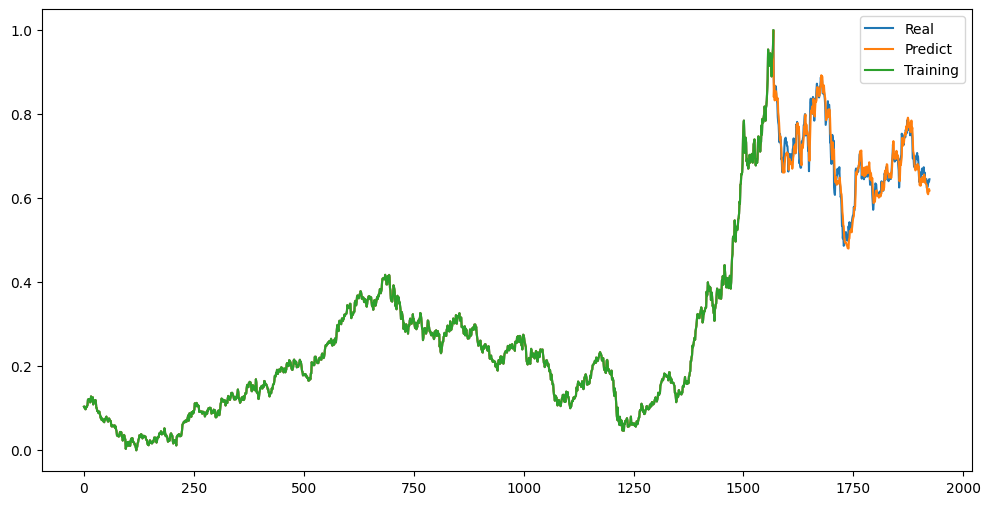

In [60]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,predict))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])


In [65]:
future = 100
lists = np.array(test_x[0]).reshape(1,test_x.shape[1],test_x.shape[2])
preds =[]
l=[]
for i in range(len(test_x)-1):
    print(i)
    pred = model.predict(lists[i].reshape(1,time_steps,test_x.shape[2]))
#     [[1,2,3],[2,3,4],[5,6,7]]
    
    pred = np.append(pred,test_x[i+1][-1][1:])
#     print(pred.reshape(1,2))
    
    l = np.vstack([lists[i],pred])
    
    preds.append(pred[0])
    l = l[1:]
    lists = np.vstack([lists,l.reshape(1,time_steps,test_x.shape[2])])
print(preds)
print(lists)

0
1/1 [==============================] - 0s 35ms/step
[0.84085631 0.14519424 0.51007112]
1
1/1 [==============================] - 0s 34ms/step
[0.85864472 0.10650052 0.40364311]
2
1/1 [==============================] - 0s 33ms/step
[0.83382833 0.08323646 0.42941067]
3
1/1 [==============================] - 0s 32ms/step
[0.83789265 0.00407954 0.42909779]
4
1/1 [==============================] - 0s 35ms/step
[0.83214533 0.07953246 0.46736271]
5
1/1 [==============================] - 0s 34ms/step
[0.83974451 0.06799116 0.45013707]
6
1/1 [==============================] - 0s 34ms/step
[0.83411777 0.1795274  0.36785327]
7
1/1 [==============================] - 0s 33ms/step
[0.82334167 0.2074501  0.37055875]
8
1/1 [==============================] - 0s 34ms/step
[0.82646209 0.35737321 0.34376766]
9
1/1 [==============================] - 0s 32ms/step
[0.82948905 0.18309395 0.26248857]
10
1/1 [==============================] - 0s 34ms/step
[0.80664217 0.18632963 0.2338278 ]
11
1/1 [============

1/1 [==============================] - 0s 38ms/step
[0.75112796 0.07615712 0.58682561]
92
1/1 [==============================] - 0s 36ms/step
[0.74716115 0.14404786 0.45193536]
93
1/1 [==============================] - 0s 33ms/step
[0.72826576 0.09219529 0.50667169]
94
1/1 [==============================] - 0s 34ms/step
[0.73728675 0.15985578 0.56655124]
95
1/1 [==============================] - 0s 38ms/step
[0.75274396 0.12539221 0.56546326]
96
1/1 [==============================] - 0s 34ms/step
[0.75345522 0.12158491 0.56324594]
97
1/1 [==============================] - 0s 35ms/step
[0.75563276 0.19792114 0.61076056]
98
1/1 [==============================] - 0s 44ms/step
[0.77205986 0.1416401  0.64075944]
99
1/1 [==============================] - 0s 43ms/step
[0.7792784  0.10226708 0.60979891]
100
1/1 [==============================] - 0s 35ms/step
[0.77506804 0.06640945 0.60979891]
101
1/1 [==============================] - 0s 45ms/step
[0.7767213  0.06116051 0.59712319]
102
1/1 [==

1/1 [==============================] - 0s 43ms/step
[0.52897847 0.06962537 0.48882672]
182
1/1 [==============================] - 0s 34ms/step
[0.53015554 0.14951594 0.56344632]
183
1/1 [==============================] - 0s 34ms/step
[0.54379416 0.19120806 0.52011445]
184
1/1 [==============================] - 0s 33ms/step
[0.54418361 0.07580986 0.55005704]
185
1/1 [==============================] - 0s 33ms/step
[0.54702401 0.20826034 0.66179093]
186
1/1 [==============================] - 0s 36ms/step
[0.57012153 0.25492308 0.78360768]
187
1/1 [==============================] - 0s 34ms/step
[0.597785   0.18980064 0.79227606]
188
1/1 [==============================] - 0s 34ms/step
[0.60338473 0.09518705 0.74348117]
189
1/1 [==============================] - 0s 37ms/step
[0.59631801 0.08969701 0.74429665]
190
1/1 [==============================] - 0s 36ms/step
[0.59894824 0.11803129 0.75538473]
191
1/1 [==============================] - 0s 34ms/step
[0.60557783 0.07880042 0.73962904]
192

1/1 [==============================] - 0s 35ms/step
[0.70503449 0.14451548 0.80519814]
272
1/1 [==============================] - 0s 38ms/step
[0.72671294 0.07271333 0.65810542]
273
1/1 [==============================] - 0s 34ms/step
[0.70319605 0.05535489 0.58226198]
274
1/1 [==============================] - 0s 34ms/step
[0.69580531 0.04427382 0.60040867]
275
1/1 [==============================] - 0s 34ms/step
[0.70277148 0.04935993 0.54083298]
276
1/1 [==============================] - 0s 48ms/step
[0.69664526 0.05157868 0.57877645]
277
1/1 [==============================] - 0s 41ms/step
[0.7053147  0.04403484 0.55677314]
278
1/1 [==============================] - 0s 39ms/step
[0.70391381 0.05396568 0.61281964]
279
1/1 [==============================] - 0s 36ms/step
[0.71583736 0.04731886 0.52209337]
280
1/1 [==============================] - 0s 36ms/step
[0.70318311 0.04790607 0.52541219]
281
1/1 [==============================] - 0s 36ms/step
[0.70578748 0.02060236 0.55099788]
282

In [34]:
future = 1750
lists = np.array(train_x[0]).reshape(1,train_x.shape[1],train_x.shape[2])
preds =[]
l=[]
for i in range(len(train_x)-1):
    print(i)
    pred = model.predict(lists[i].reshape(1,time_steps,2))
#     [[1,2,3],[2,3,4],[5,6,7]]
    
    pred = np.append(pred,train_x[i+1][-1][1])
#     print(pred.reshape(1,2))
    l = np.vstack([lists[i],pred])
    preds.append(pred[0])
    l = l[1:]
    lists = np.vstack([lists,l.reshape(1,time_steps,2)])
print(preds)
print(lists)
preds = np.array(preds)

0
1/1 [==============================] - 0s 39ms/step
1
1/1 [==============================] - 0s 34ms/step
2
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 36ms/step
4
1/1 [==============================] - 0s 38ms/step
5
1/1 [==============================] - 0s 38ms/step
6
1/1 [==============================] - 0s 37ms/step
7
1/1 [==============================] - 0s 35ms/step
8
1/1 [==============================] - 0s 34ms/step
9
1/1 [==============================] - 0s 38ms/step
10
1/1 [==============================] - 0s 60ms/step
11
1/1 [==============================] - 0s 69ms/step
12
1/1 [==============================] - 0s 37ms/step
13
1/1 [==============================] - 0s 39ms/step
14
1/1 [==============================] - 0s 39ms/step
15
1/1 [==============================] - 0s 38ms/step
16
1/1 [==============================] - 0s 37ms/step
17
1/1 [==============================] - 0s 39ms/step
18
1/1 [============

1/1 [==============================] - 0s 36ms/step
149
1/1 [==============================] - 0s 37ms/step
150
1/1 [==============================] - 0s 45ms/step
151
1/1 [==============================] - 0s 44ms/step
152
1/1 [==============================] - 0s 44ms/step
153
1/1 [==============================] - 0s 37ms/step
154
1/1 [==============================] - 0s 35ms/step
155
1/1 [==============================] - 0s 41ms/step
156
1/1 [==============================] - 0s 44ms/step
157
1/1 [==============================] - 0s 43ms/step
158
1/1 [==============================] - 0s 40ms/step
159
1/1 [==============================] - 0s 34ms/step
160
1/1 [==============================] - 0s 37ms/step
161
1/1 [==============================] - 0s 37ms/step
162
1/1 [==============================] - 0s 44ms/step
163
1/1 [==============================] - 0s 45ms/step
164
1/1 [==============================] - 0s 36ms/step
165
1/1 [==============================] - 0s 37ms/s

1/1 [==============================] - 0s 35ms/step
295
1/1 [==============================] - 0s 38ms/step
296
1/1 [==============================] - 0s 36ms/step
297
1/1 [==============================] - 0s 36ms/step
298
1/1 [==============================] - 0s 38ms/step
299
1/1 [==============================] - 0s 37ms/step
300
1/1 [==============================] - 0s 38ms/step
301
1/1 [==============================] - 0s 36ms/step
302
1/1 [==============================] - 0s 39ms/step
303
1/1 [==============================] - 0s 38ms/step
304
1/1 [==============================] - 0s 35ms/step
305
1/1 [==============================] - 0s 37ms/step
306
1/1 [==============================] - 0s 34ms/step
307
1/1 [==============================] - 0s 36ms/step
308
1/1 [==============================] - 0s 37ms/step
309
1/1 [==============================] - 0s 35ms/step
310
1/1 [==============================] - 0s 39ms/step
311
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 38ms/step
441
1/1 [==============================] - 0s 40ms/step
442
1/1 [==============================] - 0s 37ms/step
443
1/1 [==============================] - 0s 38ms/step
444
1/1 [==============================] - 0s 36ms/step
445
1/1 [==============================] - 0s 36ms/step
446
1/1 [==============================] - 0s 40ms/step
447
1/1 [==============================] - 0s 37ms/step
448
1/1 [==============================] - 0s 35ms/step
449
1/1 [==============================] - 0s 35ms/step
450
1/1 [==============================] - 0s 40ms/step
451
1/1 [==============================] - 0s 36ms/step
452
1/1 [==============================] - 0s 40ms/step
453
1/1 [==============================] - 0s 35ms/step
454
1/1 [==============================] - 0s 37ms/step
455
1/1 [==============================] - 0s 36ms/step
456
1/1 [==============================] - 0s 34ms/step
457
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 37ms/step
587
1/1 [==============================] - 0s 37ms/step
588
1/1 [==============================] - 0s 42ms/step
589
1/1 [==============================] - 0s 35ms/step
590
1/1 [==============================] - 0s 36ms/step
591
1/1 [==============================] - 0s 45ms/step
592
1/1 [==============================] - 0s 38ms/step
593
1/1 [==============================] - 0s 36ms/step
594
1/1 [==============================] - 0s 38ms/step
595
1/1 [==============================] - 0s 36ms/step
596
1/1 [==============================] - 0s 36ms/step
597
1/1 [==============================] - 0s 37ms/step
598
1/1 [==============================] - 0s 36ms/step
599
1/1 [==============================] - 0s 39ms/step
600
1/1 [==============================] - 0s 37ms/step
601
1/1 [==============================] - 0s 42ms/step
602
1/1 [==============================] - 0s 36ms/step
603
1/1 [==============================] - 0s 37ms/s

1/1 [==============================] - 0s 41ms/step
733
1/1 [==============================] - 0s 38ms/step
734
1/1 [==============================] - 0s 39ms/step
735
1/1 [==============================] - 0s 42ms/step
736
1/1 [==============================] - 0s 41ms/step
737
1/1 [==============================] - 0s 37ms/step
738
1/1 [==============================] - 0s 37ms/step
739
1/1 [==============================] - 0s 37ms/step
740
1/1 [==============================] - 0s 37ms/step
741
1/1 [==============================] - 0s 42ms/step
742
1/1 [==============================] - 0s 35ms/step
743
1/1 [==============================] - 0s 36ms/step
744
1/1 [==============================] - 0s 37ms/step
745
1/1 [==============================] - 0s 38ms/step
746
1/1 [==============================] - 0s 40ms/step
747
1/1 [==============================] - 0s 37ms/step
748
1/1 [==============================] - 0s 37ms/step
749
1/1 [==============================] - 0s 36ms/s

1/1 [==============================] - 0s 39ms/step
879
1/1 [==============================] - 0s 37ms/step
880
1/1 [==============================] - 0s 37ms/step
881
1/1 [==============================] - 0s 38ms/step
882
1/1 [==============================] - 0s 36ms/step
883
1/1 [==============================] - 0s 37ms/step
884
1/1 [==============================] - 0s 36ms/step
885
1/1 [==============================] - 0s 36ms/step
886
1/1 [==============================] - 0s 40ms/step
887
1/1 [==============================] - 0s 35ms/step
888
1/1 [==============================] - 0s 42ms/step
889
1/1 [==============================] - 0s 36ms/step
890
1/1 [==============================] - 0s 36ms/step
891
1/1 [==============================] - 0s 38ms/step
892
1/1 [==============================] - 0s 36ms/step
893
1/1 [==============================] - 0s 39ms/step
894
1/1 [==============================] - 0s 39ms/step
895
1/1 [==============================] - 0s 35ms/s

1024
1/1 [==============================] - 0s 40ms/step
1025
1/1 [==============================] - 0s 39ms/step
1026
1/1 [==============================] - 0s 39ms/step
1027
1/1 [==============================] - 0s 47ms/step
1028
1/1 [==============================] - 0s 38ms/step
1029
1/1 [==============================] - 0s 37ms/step
1030
1/1 [==============================] - 0s 34ms/step
1031
1/1 [==============================] - 0s 36ms/step
1032
1/1 [==============================] - 0s 35ms/step
1033
1/1 [==============================] - 0s 38ms/step
1034
1/1 [==============================] - 0s 38ms/step
1035
1/1 [==============================] - 0s 38ms/step
1036
1/1 [==============================] - 0s 38ms/step
1037
1/1 [==============================] - 0s 41ms/step
1038
1/1 [==============================] - 0s 38ms/step
1039
1/1 [==============================] - 0s 48ms/step
1040
1/1 [==============================] - 0s 47ms/step
1041
1/1 [=====================

1/1 [==============================] - 0s 34ms/step
1168
1/1 [==============================] - 0s 37ms/step
1169
1/1 [==============================] - 0s 47ms/step
1170
1/1 [==============================] - 0s 50ms/step
1171
1/1 [==============================] - 0s 40ms/step
1172
1/1 [==============================] - 0s 36ms/step
1173
1/1 [==============================] - 0s 37ms/step
1174
1/1 [==============================] - 0s 37ms/step
1175
1/1 [==============================] - 0s 36ms/step
1176
1/1 [==============================] - 0s 34ms/step
1177
1/1 [==============================] - 0s 38ms/step
1178
1/1 [==============================] - 0s 36ms/step
1179
1/1 [==============================] - 0s 37ms/step
1180
1/1 [==============================] - 0s 35ms/step
1181
1/1 [==============================] - 0s 40ms/step
1182
1/1 [==============================] - 0s 39ms/step
1183
1/1 [==============================] - 0s 37ms/step
1184
1/1 [==========================

1/1 [==============================] - 0s 37ms/step
1311
1/1 [==============================] - 0s 36ms/step
1312
1/1 [==============================] - 0s 35ms/step
1313
1/1 [==============================] - 0s 36ms/step
1314
1/1 [==============================] - 0s 37ms/step
1315
1/1 [==============================] - 0s 36ms/step
1316
1/1 [==============================] - 0s 36ms/step
1317
1/1 [==============================] - 0s 35ms/step
1318
1/1 [==============================] - 0s 35ms/step
1319
1/1 [==============================] - 0s 37ms/step
1320
1/1 [==============================] - 0s 35ms/step
1321
1/1 [==============================] - 0s 48ms/step
1322
1/1 [==============================] - 0s 35ms/step
1323
1/1 [==============================] - 0s 38ms/step
1324
1/1 [==============================] - 0s 38ms/step
1325
1/1 [==============================] - 0s 35ms/step
1326
1/1 [==============================] - 0s 37ms/step
1327
1/1 [==========================

1/1 [==============================] - 0s 37ms/step
1454
1/1 [==============================] - 0s 37ms/step
1455
1/1 [==============================] - 0s 36ms/step
1456
1/1 [==============================] - 0s 38ms/step
1457
1/1 [==============================] - 0s 38ms/step
1458
1/1 [==============================] - 0s 40ms/step
1459
1/1 [==============================] - 0s 37ms/step
1460
1/1 [==============================] - 0s 37ms/step
1461
1/1 [==============================] - 0s 42ms/step
1462
1/1 [==============================] - 0s 34ms/step
1463
1/1 [==============================] - 0s 36ms/step
1464
1/1 [==============================] - 0s 44ms/step
1465
1/1 [==============================] - 0s 36ms/step
1466
1/1 [==============================] - 0s 40ms/step
1467
1/1 [==============================] - 0s 38ms/step
1468
1/1 [==============================] - 0s 38ms/step
1469
1/1 [==============================] - 0s 37ms/step
1470
1/1 [==========================

1/1 [==============================] - 0s 36ms/step
1597
1/1 [==============================] - 0s 37ms/step
1598
1/1 [==============================] - 0s 38ms/step
1599
1/1 [==============================] - 0s 35ms/step
1600
1/1 [==============================] - 0s 37ms/step
1601
1/1 [==============================] - 0s 37ms/step
1602
1/1 [==============================] - 0s 39ms/step
1603
1/1 [==============================] - 0s 35ms/step
1604
1/1 [==============================] - 0s 37ms/step
1605
1/1 [==============================] - 0s 37ms/step
1606
1/1 [==============================] - 0s 37ms/step
1607
1/1 [==============================] - 0s 46ms/step
1608
1/1 [==============================] - 0s 46ms/step
1609
1/1 [==============================] - 0s 39ms/step
1610
1/1 [==============================] - 0s 37ms/step
1611
1/1 [==============================] - 0s 36ms/step
1612
1/1 [==============================] - 0s 34ms/step
1613
1/1 [==========================

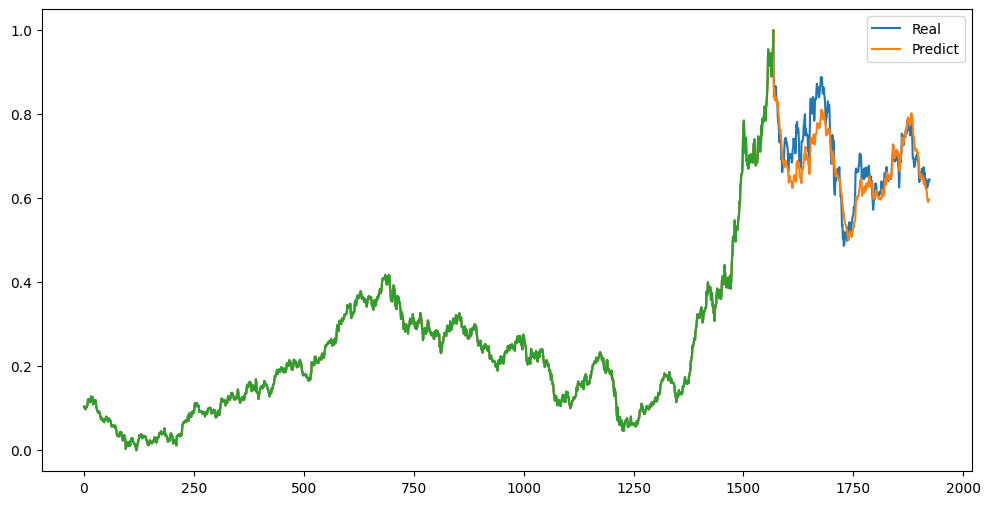

In [66]:
plt.figure(figsize=(12,6))
# plt.plot(data["Close"])
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,preds))
plt.plot(train_y)
plt.legend(["Real",'Predict'])

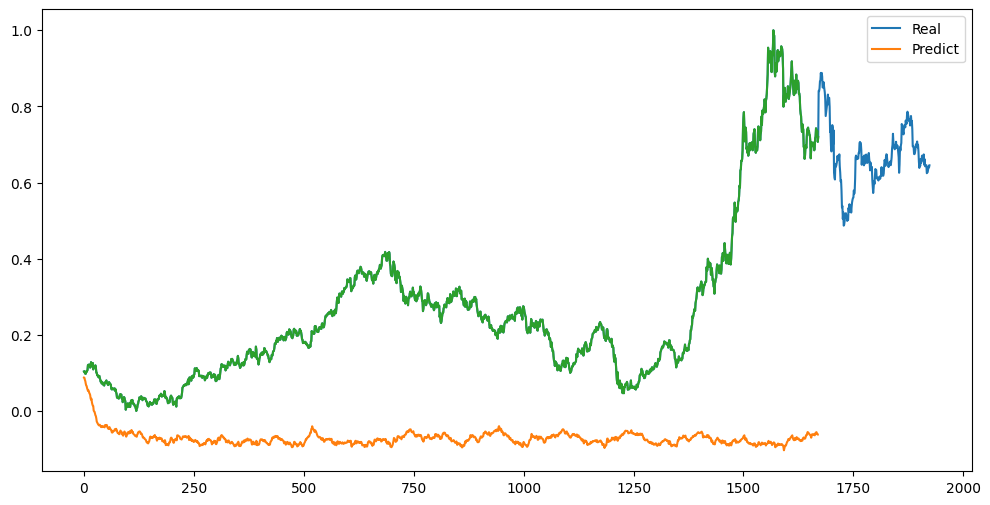

In [36]:
plt.figure(figsize=(12,6))
# plt.plot(data["Close"])
plt.plot(np.append(train_y,test_y))
plt.plot(preds)
plt.plot(train_y)
plt.legend(["Real",'Predict'])